In [1]:
!pip install tensorflow
!pip install pillow
!pip install scipy
!pip install matplotlib

In [2]:
pip install --upgrade tensorflow

  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/80/6f/57d36f6507e432d7fc1956b2e9e8530c5c2d2bfcd8821bcbfae271cd6688/tensorflow-2.14.0-cp311-cp311-win_amd64.whl.metadata
  Using cached tensorflow-2.14.0-cp311-cp311-win_amd64.whl.metadata (3.3 kB)
  Obtaining dependency information for tensorflow-intel==2.14.0 from https://files.pythonhosted.org/packages/ad/6e/1bfe367855dd87467564f7bf9fa14f3b17889988e79598bc37bf18f5ffb6/tensorflow_intel-2.14.0-cp311-cp311-win_amd64.whl.metadata
  Using cached tensorflow_intel-2.14.0-cp311-cp311-win_amd64.whl.metadata (4.8 kB)
  Obtaining dependency information for absl-py>=1.0.0 from https://files.pythonhosted.org/packages/01/e4/dc0a1dcc4e74e08d7abedab278c795eef54a224363bb18f5692f416d834f/absl_py-2.0.0-py3-none-any.whl.metadata
  Using cached absl_py-2.0.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Obtaining dependency information for flatbuffers>=23.5.26

In [3]:
import tensorflow as tf
import PIL
from PIL import Image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (Dropout, Dense, Softmax)
from tensorflow.keras.applications import mobilenet as _mobilenet
import random
import os
import numpy as np
from subprocess import call
import scipy
import matplotlib.pyplot as plt
from matplotlib import cm
import math
from decimal import Decimal, localcontext

from pathlib import Path




def opF(path):
    p = Path(path)
    os.startfile(p) # for Windows
   

In [4]:
def load_image(img_file, target_size=(224,224)):
    X = np.zeros((1, *target_size, 3))
    X[0, ] = np.asarray(tf.keras.preprocessing.image.load_img(
        img_file, 
        target_size=target_size)
    )
    X = tf.keras.applications.mobilenet.preprocess_input(X)
    return X

def ensure_folder_exists(folder):
    if not os.path.exists(folder):
        os.makedirs(folder)

In [5]:
model = tf.keras.applications.mobilenet.MobileNet()
model.summary()

17225924/17225924 [==============================] - 2s 0us/step
Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizati  (None, 112, 112, 32)      128       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 112, 112, 32)      288       
 )                                                               
                                                 

 conv_pw_7_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_dw_8 (DepthwiseConv2D  (None, 14, 14, 512)       4608      
 )                                                               
                                                                 
 conv_dw_8_bn (BatchNormali  (None, 14, 14, 512)       2048      
 zation)                                                         
                                                                 
 conv_dw_8_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_pw_8 (Conv2D)          (None, 14, 14, 512)       262144    
                                                                 
 conv_pw_8_bn (BatchNormali  (None, 14, 14, 512)       2048      
 zation)                                                         
                                                                 
 conv_pw_8

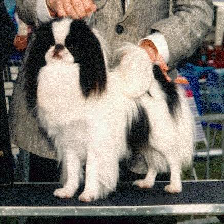

In [6]:
dog_image_id = os.listdir('C:\\Users\\ASUS\\Desktop\\rc11\\SKILL COURSE\\class1\\images\\dog')[0]
dog_path = os.path.join('C:\\Users\\ASUS\\Desktop\\rc11\\SKILL COURSE\\class1\\images\\dog',dog_image_id)
dog_image = load_image(dog_path)

tf.keras.preprocessing.image.load_img(dog_path, target_size=(224,224))

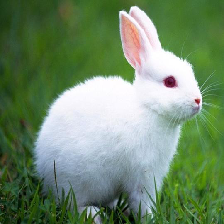

In [7]:
dog_image_id = os.listdir('Images/dog')[0]
dog_path = os.path.join('Images/dog',dog_image_id)
dog_image = load_image(dog_path)

tf.keras.preprocessing.image.load_img(dog_path, target_size=(224,224))

cat_image_id = os.listdir('Images/cat')[0]
cat_path = os.path.join('Images/cat',cat_image_id)
cat_image = load_image(cat_path)

tf.keras.preprocessing.image.load_img(cat_path, target_size=(224,224))

parrot_image_id = os.listdir('Images/parrot')[0]
parrot_path = os.path.join('Images/parrot',parrot_image_id)
parrot_image = load_image(parrot_path)

tf.keras.preprocessing.image.load_img(parrot_path, target_size=(224,224))

rabbit_image_id = os.listdir('Images/rabbit')[0]
rabbit_path = os.path.join('Images/rabbit',rabbit_image_id)
rabbit_image = load_image(rabbit_path)

tf.keras.preprocessing.image.load_img(rabbit_path, target_size=(224,224))

In [8]:
model = tf.keras.applications.mobilenet.MobileNet(
# The 3 is the three dimensions of the input: r,g,b.
  input_shape=(224, 224, 3), 
  include_top=False, 
  pooling='avg'
)

17225924/17225924 [==============================] - 2s 0us/step


In [9]:
dog_image = load_image(dog_path)
f = model.predict(dog_image)

1/1 [==============================] - 1s 603ms/step


In [10]:
print(f)

[[0.37237954 0.         0.31618524 ... 0.15015016 0.40728402 2.3929021 ]]


In [11]:
x = Dropout(rate=0.4)(model.output)
# This determines the number of outputs, and thus the number of categories, in my test case 2: dog or cat
x = Dense(4)(x)
x = Softmax()(x)
model= Model(model.inputs, x)

In [12]:
for layer in model.layers[:-3]:
    layer.trainable = False

In [13]:
from tensorflow.keras.optimizers import Adam
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy'
)

In [14]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=_mobilenet.preprocess_input,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.1
)

ensure_folder_exists('training_aug')
training = datagen.flow_from_directory( 
    'Images', 
    target_size=(224, 224),
    save_to_dir='./training_aug',
    subset='training'
) 

ensure_folder_exists('validation_aug')
validation = datagen.flow_from_directory( 
    'Images',
    target_size=(224, 224),
    save_to_dir='./validation_aug',
    subset='validation'
) 

Found 591 images belonging to 4 classes.
Found 65 images belonging to 4 classes.


In [15]:
batch_size = 32
epochs=6

history = model.fit(
    x=training,
    steps_per_epoch=training.samples // batch_size,
    epochs=epochs,
    validation_data=validation,
    validation_steps=validation.samples // batch_size
)

Epoch 1/6
18/18 [==============================] - 37s 2s/step - loss: 1.3388 - val_loss: 0.6451
Epoch 2/6
18/18 [==============================] - 32s 2s/step - loss: 0.5372 - val_loss: 0.3049
Epoch 3/6
18/18 [==============================] - 33s 2s/step - loss: 0.3453 - val_loss: 0.2259
Epoch 4/6
18/18 [==============================] - 32s 2s/step - loss: 0.2081 - val_loss: 0.1569
Epoch 5/6
18/18 [==============================] - 32s 2s/step - loss: 0.1812 - val_loss: 0.1393
Epoch 6/6
18/18 [==============================] - 32s 2s/step - loss: 0.1411 - val_loss: 0.1418


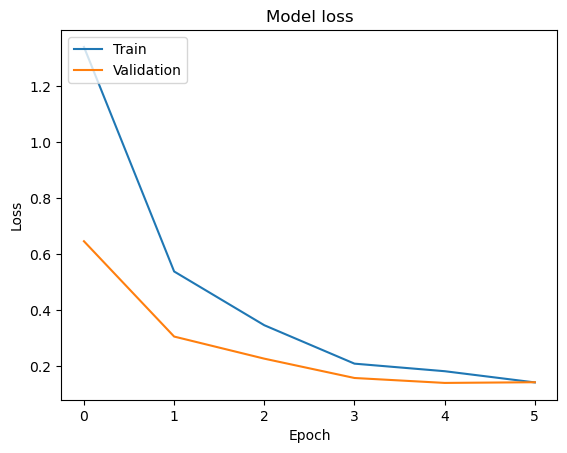

In [16]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [19]:
random_cat = random.choice(os.listdir('Images/cat'))
cat_path = os.path.join('Images/cat',random_cat)
cat = load_image(cat_path)

random_dog = random.choice(os.listdir('Images/dog'))
dog_path = os.path.join('Images/dog',random_dog)
dog = load_image(dog_path)

random_parrot = random.choice(os.listdir('Images/parrot'))
parrot_path = os.path.join('Images/parrot',random_parrot)
parrot = load_image(parrot_path)

random_rabbit = random.choice(os.listdir('Images/rabbit'))
rabbit_path = os.path.join('Images/rabbit',random_rabbit)
rabbit = load_image(rabbit_path)

tf.keras.preprocessing.image.load_img(cat_path, target_size=(224,224))
tf.keras.preprocessing.image.load_img(dog_path, target_size=(224,224))
tf.keras.preprocessing.image.load_img(parrot_path, target_size=(224,224))
tf.keras.preprocessing.image.load_img(rabbit_path, target_size=(224,224))

print(f'''cat:{np.round(model.predict(cat),4)}''')
print(f'''dog:{np.round(model.predict(dog),4)}''')
print(f'''parrot:{np.round(model.predict(parrot),4)}''')
print(f'''rabbit:{np.round(model.predict(rabbit),4)}''')

1/1 [==============================] - 1s 538ms/step
cat:[[9.926e-01 6.700e-03 0.000e+00 7.000e-04]]
1/1 [==============================] - 0s 46ms/step
dog:[[0.2076 0.7825 0.0064 0.0036]]
1/1 [==============================] - 0s 44ms/step
parrot:[[4.300e-03 4.700e-03 9.907e-01 3.000e-04]]
1/1 [==============================] - 0s 46ms/step
rabbit:[[0.3248 0.0161 0.0101 0.6491]]


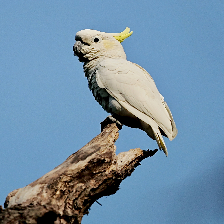

In [20]:
test_path = 'Images/test.jpg'
test = load_image(test_path)
tf.keras.preprocessing.image.load_img(test_path, target_size=(224,224))

In [22]:
print(f'''test:{np.round(model.predict(test),2)}''')

1/1 [==============================] - 0s 46ms/step
test:[[0.19 0.32 0.48 0.01]]
